# Movie Recommendation System

A movie recommendation system is a technology that shows films to customers primarily based totally on their preferences, behaviors, and different applicable facts. The aim of this kind of system is to assist customers to find out new films that they're probably to enjoy, thereby improving their standard viewing experience. There are different types of recommendation systems, and one common method includes the use of algorithms to investigate user facts and make predictions approximately what films a person is probably involved in.

### Types of Movie Recommendation system:
There are three types ofmovie recommendation system:
##### 1. Demographic Filtering :
This system will recommend the movie based on the users demographics such as location, age, gender and will assume that users with same demographic have similar preferences and intrests.
##### 2. Content based Movie Recommemdation System : 
This system will recommend movies to the user based on their preference by analyzing their intraction history with the movie. For example, If a user frequently watch adventure movies, the system will recommend other adventure movies.
###### Steps:
1. Feature Extraction
2. Creating User Profile
3. Similarity Calculation

##### 3. Collaborative  Filtering Recommemdation System
This system will focus on interaction pattern of multiple users to make recommendations. This System basically based on the likes , dislikes and rating of other users to recommend that movies to particular user.


### Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
df_credits = pd.read_csv('tmdb_5000_credits.csv')
df_movies = pd.read_csv('tmdb_5000_movies.csv')

In [4]:
df_credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
df_credits.shape

(4803, 4)

In [6]:
df_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [7]:
df_movies.shape

(4803, 20)

In [8]:
df_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [9]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [10]:
df_credits.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [11]:
df_movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [12]:
df_credits.describe()

,movie_id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


In [13]:
df_movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


### Data Preperation

In [14]:
credits_column_renamed = df_credits.rename(index = str ,columns={"movie_id" : "id"})

In [15]:
df_merged = df_movies.merge(credits_column_renamed, on = "id")

In [16]:
df_merged.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [17]:
df_merged.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew'],
      dtype='object')

## 1. Demographic filtering 

where,

v is the Vote_count of a movie;
m is the minimum votes required to be listed in the top chart;
R is the average rating of the movie; And
C is the mean vote across the whole report

In [18]:
C= df_merged['vote_average'].mean()
print(C)

6.092171559442011


In [19]:
m= df_merged['vote_count'].quantile(0.9)
m

1838.4000000000015

In [21]:
q_movies = df_merged.copy().loc[df_merged['vote_count'] >= m]
q_movies.shape

(481, 23)

In [22]:
def weightedrating(x,m=m,C=C):
    
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [23]:
q_movies['weight_score'] = q_movies.apply(weightedrating, axis=1)


In [24]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('weight_score', ascending=False)

#Print the top 20 movies
q_movies[['original_title', 'vote_count', 'vote_average', 'weight_score']].head(20)

,original_title,vote_count,vote_average,weight_score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Text(0.5, 1.0, 'Popular Movies')

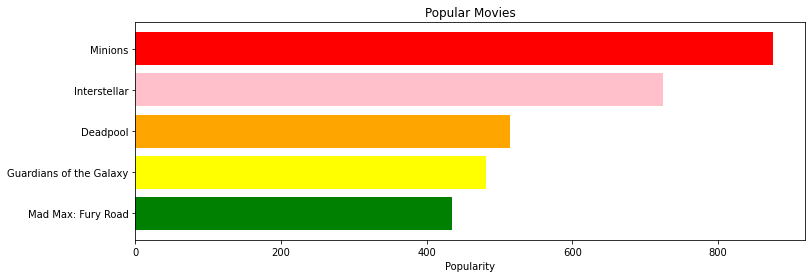

In [25]:
pop= df_merged.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['original_title'].head(5),pop['popularity'].head(5), align='center',
        color=['red','pink','orange','yellow','green'])
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

## 2. Content Based Recomendation System

#### Data Preprocessing:
Importing libraries such as TfidfVectorizer and linear_kernal

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics.pairwise import linear_kernel

#### Feature Extraction:

In [27]:
plots = df_merged['overview']
tfidf = TfidfVectorizer(stop_words = 'english' , max_df = 4 , min_df= 1)
plots = plots.fillna('')
tfidf_matrix = tfidf.fit_transform(plots)

#### Similirity Calculation:

In [28]:
cos_similar = linear_kernel(tfidf_matrix , tfidf_matrix)
cos_similar.shape

(4803, 4803)

In [29]:
indices = pd.Series(df_merged.index , index = df_merged['original_title']).drop_duplicates()

#### Recommendation Function:
Creating a function to take movie title as input and retuen the recommendned movies based on their similiarity.

In [30]:
def get_movies(title):
    idx = indices[title]
    similar = list(enumerate(cos_similar[idx]))
    similar = sorted(similar , key = lambda x: x[1] , reverse = True)
    similar = similar[:11]
    indic = []
    for i in similar:
        indic.append(i[0])
    return df_merged['original_title'].iloc[indic]

#### Testing:
Finalizing the content-based movie recommendation model by testing the system, giving the movie title as input and getting the recommended movies as output.

In [31]:
get_movies('Avatar')

0                                         Avatar
634                                   The Matrix
775                                    Supernova
1341                            Obitaemyy Ostrov
1       Pirates of the Caribbean: At World's End
2                                        Spectre
3                          The Dark Knight Rises
4                                    John Carter
5                                   Spider-Man 3
6                                        Tangled
7                        Avengers: Age of Ultron
Name: original_title, dtype: object

## 3. Collaborative Filtering Recommendation System

#### Creating User- movies matrix:
Creating User- movies matrix where row represent users and column represent movies, and each cell represent user rating for a movie.

In [32]:
movie_pivot=df_merged.pivot_table(columns='id',index='original_title',values='vote_average')

In [33]:
movie_pivot.shape

(4801, 4803)

In [34]:
movie_pivot.fillna(0,inplace=True)

In [35]:
movie_pivot

id,5,11,12,13,14,16,18,19,20,22,...,396152,402515,407887,408429,417859,426067,426469,433715,447027,459488
original_title,,,,,,,,,,,,,,,,,,,,,
#Horror,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
$upercapitalist,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
(500) Days of Summer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...E tu vivrai nel terrore! L'aldilà,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Cloverfield Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
인천상륙작전,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"좋은 놈, 나쁜 놈, 이상한 놈",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
친절한 금자씨,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Similarity Calculation

In [36]:
from scipy.sparse import csr_matrix
movie_sparse=csr_matrix(movie_pivot)

In [37]:
from sklearn.neighbors import NearestNeighbors
model=NearestNeighbors( n_neighbors=7,algorithm='brute',metric='cosine')

In [38]:
model.fit(movie_sparse)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=7)

In [39]:
distances,suggestions=model.kneighbors(movie_pivot.iloc[540,:].values.reshape(1,-1))

In [40]:
distances

array([[0., 1., 1., 1., 1., 1., 1.]])

In [41]:
suggestions

array([[ 540, 3204, 3202, 3203, 3200, 3205, 3198]], dtype=int64)

In [42]:
df1=df_merged.copy()
ti=[]
for i in df1['original_title']:
    ti.append(i.split(' (')[0])
df1['original_title']=ti

In [43]:
for i in range(len(suggestions)):
    print(movie_pivot.index[suggestions[i]])

Index(['Blonde Ambition', 'Split Second', 'Splash', 'Splice', 'Spider-Man 3',
       'Spotlight', 'Spider-Man'],
      dtype='object', name='original_title')


#### Recommendation Function:
Creating recommendation function taking user id as input and recommending list of movies as output.

In [44]:
def reco(movie_name):
    movie_id=df1[df1['original_title']=='Toy Story'].drop_duplicates('original_title')['id'].values[0]
    distances,suggestions=model.kneighbors(movie_pivot.iloc[movie_id,:].values.reshape(1,-1))
    
    
    
    for i in range(len(suggestions)):
        return (movie_pivot.index[suggestions[i]])

#### Testing
Finalizing the collaborative movie recommendation model by testing the system, giving the user ids as input and getting the list of recommended movies  as output.

In [45]:
res=reco("It Conquered the World")

In [46]:
for i in res:
    print(i)

Creepshow
Splash
Spirit: Stallion of the Cimarron
Split Second
Splice
Spotlight
Spider-Man


In [5]:
import os

os.getcwd()

'C:\\Users\\hp\\Desktop\\ML_DL'

In [18]:
import jupyter_to_medium

jupyter_to_medium.publish('MovieRecommendationSystem.ipynb', integration_token_id)

NameError: name 'integration_token_id' is not defined